E:\Project\Strategy_1\Data/250 Toss/1% Risk/CSVs/Strategy1_1%Risk_250Toss_10Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/1% Risk/CSVs/Strategy1_1%Risk_250Toss_50Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/1% Risk/CSVs/Strategy1_1%Risk_250Toss_100Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/1% Risk/CSVs/Strategy1_1%Risk_250Toss_250Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/1% Risk/CSVs/Strategy1_1%Risk_250Toss_500Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/1% Risk/CSVs/Strategy1_1%Risk_250Toss_1000Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/5% Risk/CSVs/Strategy1_5%Risk_250Toss_10Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/5% Risk/CSVs/Strategy1_5%Risk_250Toss_50Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/5% Risk/CSVs/Strategy1_5%Risk_250Toss_100Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/5% Risk/CSVs/Strategy1_5%Risk_250Toss_250Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/5% Risk/CSVs/Strategy1_5%Risk_250Toss_500Rpt.csv
E:\Project\Strategy_1\Data/250 Toss/5% Risk/CSVs/Strategy1_5%Risk_25

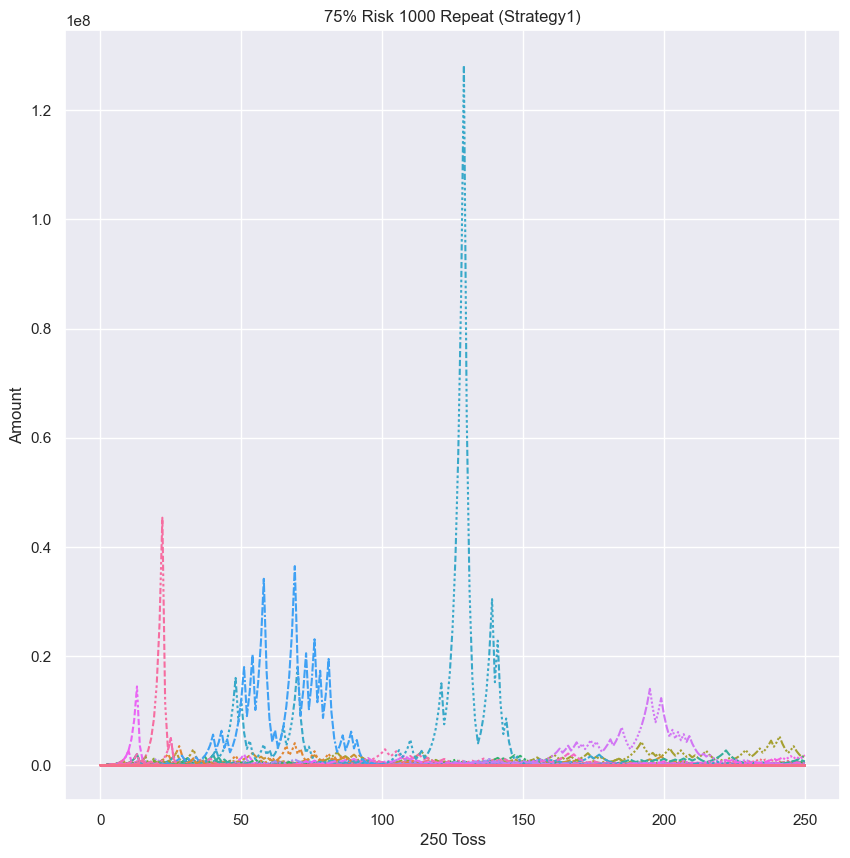

In [1]:
# Coin Flip Simulation

## Importing the libraies

import numpy as np
import pandas as pd
import matplotlib as plt
## Declaration Assumption
# - Heads = H: 0
# - Tails = T: 1

## Data Frame Struct for Csv generation

# print(Global_Data)
## Function:
import random

# Function: Coin flipper 
def flip():
    li = ['H','T']
    return(random.choice(li))


# Function: Probability Finder
def prob(count_head,num_toss):
    if num_toss == 0:
        return 0.0
    else:
        prob = count_head/num_toss
        prob = round(prob,1)
        return prob


# Function: Predicator
# Preduction Strategy: IF count of head with respect to num of toss decrease then Predict: Heads elsel: Tails
def predict(probability):
    if probability > 0.5:
        return 'T'
    else:
        return 'H'

# Function: Result Finder

def outcome(pred,result):
    if pred == result:
        return 'Win'
    else:
        return 'Lose'
## Data Generation
### Tuning Parameter
# [1,5,10,25,50,75]
# Loop Over Num_Toss
for m in [250]:
  # loop over Risk
  for l in [1,5,10,25,50,75]:
    # Loop over Repeat
    for k in [10,50,100,250,500,1000]:
      data = pd.DataFrame(columns=['Number','Amount','Bet', 'Probability','Predication', 'Toss', 'Result','Heads','Tails'])
      # print(data)
      Global_Data = pd.DataFrame()
      Num_Toss = m
      Repeat = k
      Starting_Amount = 10000
      Risk = l
      Risk_factor = Risk/100
      first_predict = flip()
      # data = pd.DataFrame(columns=['Number','Amount','Betting Amount', 'Probability','Predication', 'Toss', 'Result','Heads','Tails'])
      ## Inserting Initial values 
      # Inserting Initial values 
      count_heads = 0
      count_tails = 0
      toss = flip()
      if toss == 'H':
          count_heads += 1
      else:
          count_tails += 1
      data = data.drop(data.index)
      start = pd.DataFrame({'Number' : [0] ,
              'Amount' : Starting_Amount,
              'Bet': Starting_Amount*Risk_factor,
              'Probability': prob(count_heads,1),
              'Predication': first_predict,
              'Toss' : toss,
              'Result': outcome(first_predict,toss),
              'Heads': count_heads,
              'Tails': count_tails})

      data = pd.concat([data,start],ignore_index=True)
      ## Running the Stimulation 'N' times

      for j in range(Repeat):

          # Inserting Initial values 
          count_heads = 0
          count_tails = 0
          toss = flip()
          if toss == 'H':
              count_heads += 1
          else:
              count_tails += 1
          data = data.drop(data.index)
          start = pd.DataFrame({'Number' : [0] ,
                  'Amount' : Starting_Amount,
                  'Bet': Starting_Amount*Risk_factor,
                  'Probability': prob(count_heads,1),
                  'Predication': first_predict,
                  'Toss' : toss,
                  'Result': outcome(first_predict,toss),
                  'Heads': count_heads,
                  'Tails': count_tails})

          data = pd.concat([data,start],ignore_index=True)

      # Running the Stimulation 1 
          for i in range(1,Num_Toss + 1):
          # Calculating the Values for Inserting
              # Amount
              amount = 0
              prev = data.loc[i-1]
              if prev.Result == 'Win':
                  amount = prev.Amount + prev.Bet
              else:
                  amount = prev.Amount - prev.Bet
              # print(amount)
              # Bet
              bet = amount*Risk_factor
              # Predication
              pred = predict(prob(count_heads,i+1))
              # Toss
              toss = flip()
              if toss == 'H':
                  count_heads += 1
              else:
                  count_tails += 1
              
              temp = pd.DataFrame({'Number' : [i] ,
                                  'Amount' : amount,
                                  'Bet': bet,
                                  'Probability': prob(count_heads,i+1),
                                  'Predication': pred,
                                  'Toss' : toss,
                                  'Result': outcome(pred,toss),
                                  'Heads': count_heads,
                                  'Tails': count_tails})
              data = pd.concat([data,temp],ignore_index=True)

          Result_End = data.pivot_table(columns=['Result'],aggfunc = 'size')
          data = pd.concat([data,Result_End])
          Global_Data = pd.concat([Global_Data,data.iloc[:, : ]],axis=1)
          Result_End = Result_End.drop(Result_End.index)
          data = data.drop(data.index)
      ## Exporting the Data
      # Exporting only Amount
      # /content/50T/{l}/CSVs/{k}/
      name_amount = f'E:\Project\Strategy_1\Data/{m} Toss/{l}% Risk/CSVs/Strategy1_{Risk}%Risk_{Num_Toss}Toss_{Repeat}Rpt_Amount.csv'
      # /content/50T/{l}/CSVs/{k}/
      name = f'E:\Project\Strategy_1\Data/{m} Toss/{l}% Risk/CSVs/Strategy1_{Risk}%Risk_{Num_Toss}Toss_{Repeat}Rpt.csv'
      print(name)
      Global_Data['Amount'].to_csv(name_amount)
      # # Exporting the Amount and Pivot Tables
      Global_Data.iloc[:,1:].to_csv(name)
      Global_Data = Global_Data.drop(Global_Data.index)


      # Data Visualization

      import numpy as np
      import pandas as pd
      import seaborn as sns
      ## Visualizing Data
      import seaborn as sns
      sns.set_theme(style="whitegrid")
      dataset = pd.read_csv(name_amount)
      # dataset.info
      from matplotlib import pyplot as plt

      plot_title = f'{Risk}% Risk {Repeat} Repeat (Strategy1)'
      # /content/50T/{l}/Images/{k}/
      plot_name = f'E:\Project\Strategy_1\Data/{m} Toss/{l}% Risk/Images/Strategy1_{Risk}%Risk_{Num_Toss}Toss_{Repeat}Rpt.png'

      sns.set(rc={"figure.figsize":(10, 10)})
      grp = sns.lineplot(data = dataset.iloc[:m+1, :]).set(title=plot_title)
      plt.legend('', frameon=False)
      plot_x_label = f'{m} Toss'
      plt.xlabel(plot_x_label)
      plt.ylabel("Amount")
      plt.savefig(plot_name, dpi=500,bbox_inches='tight')
      dataset = dataset.drop(dataset.index)
